In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
#Force TotalCharges to be numeric
# 'coerce' skips over exceptions seeing nonnumeric data i.e. spaces " "
# and instead replaces nonnumeric data with NaN
total_charges = pd.to_numeric(df.TotalCharges, errors = 'coerce')
#Setting missing values to 0
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = df.TotalCharges.fillna(0)

In [5]:
#Uniform naming by lowercasing everything
df.columns = df.columns.str.lower().str.replace(' ', '_')

#.index gets the labels that identify each row
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [6]:
print(df.columns)
print("")
print(df.dtypes)

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object


In [7]:
#Convert Y/N to numbers in churn column

# 'df.churn == yes' creates a Pandas series of type boolean
# '.astype(int)' casts the T/F values to 0 and 1
df.churn = (df.churn == 'yes').astype(int)
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

1. Standardize the data
2. Constuct Covariance Matrix
3. Obtain eigenvalues and eigenvectors
4. Sort eigenvalues in descending order

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# First, handle categorical variables by encoding them
# Identify categorical columns (those with string values like 'Female')
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('customerid')

# Create a copy of the dataframe to avoid modifying the original
df_processed = df.copy()

# Apply one-hot encoding to categorical columns
if categorical_cols:
    # Option 1: Use OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_data = encoder.fit_transform(df_processed[categorical_cols])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
    
    # Drop original categorical columns and add encoded ones
    df_processed = df_processed.drop(columns=categorical_cols)
    df_processed = pd.concat([df_processed, encoded_df], axis=1)
    
    # Alternative Option 2: Use pandas get_dummies
    # df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

# 'X' gets feature variables from second column to end of df
# 'y' is target variable from first column of df
# X, y = df_processed.iloc[:, 1:].values, df_processed.iloc[:, 0].values
X = df_processed.drop(columns=['churn', 'customerid'])  # Explicitly drop target variable and customerid
y = df_processed['churn'].values

# Split training and test datasets into 70% and 30% respectively
# 'stratify = y' makes sure train and test sets have same number of labels as original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the features
sc = StandardScaler()
# Transforms training/test data by making sure Mean = 0 and STD = 1.
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
X_train.head()

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_male,partner_yes,dependents_yes,phoneservice_yes,multiplelines_no_phone_service,multiplelines_yes,...,streamingtv_no_internet_service,streamingtv_yes,streamingmovies_no_internet_service,streamingmovies_yes,contract_one_year,contract_two_year,paperlessbilling_yes,paymentmethod_credit_card_(automatic),paymentmethod_electronic_check,paymentmethod_mailed_check
3580,0,9,72.90,651.40,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2364,0,14,82.65,1185.00,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6813,0,64,47.85,3147.50,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
789,0,72,69.65,4908.25,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
561,0,3,23.60,89.05,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [10]:
X_train_std_visual = pd.DataFrame(X_train_std, columns = ['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges',
       'gender_male', 'partner_yes', 'dependents_yes', 'phoneservice_yes',
       'multiplelines_no_phone_service', 'multiplelines_yes',
       'internetservice_fiber_optic', 'internetservice_no',
       'onlinesecurity_no_internet_service', 'onlinesecurity_yes',
       'onlinebackup_no_internet_service', 'onlinebackup_yes',
       'deviceprotection_no_internet_service', 'deviceprotection_yes',
       'techsupport_no_internet_service', 'techsupport_yes',
       'streamingtv_no_internet_service', 'streamingtv_yes',
       'streamingmovies_no_internet_service', 'streamingmovies_yes',
       'contract_one_year', 'contract_two_year', 'paperlessbilling_yes',
       'paymentmethod_credit_card_(automatic)',
       'paymentmethod_electronic_check', 'paymentmethod_mailed_check'])

In [11]:
#X
#X_train.T
#X_train_std.T
#X_train.columns
X_train_std_visual.head()

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_male,partner_yes,dependents_yes,phoneservice_yes,multiplelines_no_phone_service,multiplelines_yes,...,streamingtv_no_internet_service,streamingtv_yes,streamingmovies_no_internet_service,streamingmovies_yes,contract_one_year,contract_two_year,paperlessbilling_yes,paymentmethod_credit_card_(automatic),paymentmethod_electronic_check,paymentmethod_mailed_check
0,-0.435843,-0.955202,0.267938,-0.720992,-1.000406,-0.975156,1.523845,0.327290,-0.327290,-0.853943,...,-0.520840,1.264994,-0.520840,1.254220,-0.52084,-0.553762,0.816842,-0.523356,-0.714758,1.834856
1,-0.435843,-0.751110,0.593797,-0.484526,0.999594,1.025477,-0.656235,0.327290,-0.327290,1.171039,...,-0.520840,-0.790517,-0.520840,-0.797308,-0.52084,-0.553762,0.816842,-0.523356,1.399074,-0.545002
2,-0.435843,1.289814,-0.569268,0.385159,-1.000406,1.025477,-0.656235,-3.055394,3.055394,-0.853943,...,-0.520840,-0.790517,-0.520840,1.254220,-0.52084,1.805829,-1.224227,-0.523356,1.399074,-0.545002
3,-0.435843,1.616362,0.159319,1.165437,0.999594,-0.975156,-0.656235,0.327290,-0.327290,1.171039,...,-0.520840,-0.790517,-0.520840,-0.797308,-0.52084,1.805829,-1.224227,-0.523356,-0.714758,-0.545002
4,-0.435843,-1.200113,-1.379738,-0.970198,0.999594,1.025477,-0.656235,0.327290,-0.327290,1.171039,...,1.919977,-0.790517,1.919977,-0.797308,-0.52084,-0.553762,0.816842,-0.523356,-0.714758,1.834856


In [12]:
X_train_std_visual.describe().round(3)

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_male,partner_yes,dependents_yes,phoneservice_yes,multiplelines_no_phone_service,multiplelines_yes,...,streamingtv_no_internet_service,streamingtv_yes,streamingmovies_no_internet_service,streamingmovies_yes,contract_one_year,contract_two_year,paperlessbilling_yes,paymentmethod_credit_card_(automatic),paymentmethod_electronic_check,paymentmethod_mailed_check
count,4930.000,4930.000,4930.000,4930.000,4930.0,4930.000,4930.000,4930.000,4930.000,4930.000,...,4930.000,4930.000,4930.000,4930.000,4930.000,4930.000,4930.000,4930.000,4930.000,4930.000
mean,-0.000,-0.000,0.000,0.000,0.0,-0.000,-0.000,-0.000,-0.000,0.000,...,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.0,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-0.436,-1.323,-1.540,-1.010,-1.0,-0.975,-0.656,-3.055,-0.327,-0.854,...,-0.521,-0.791,-0.521,-0.797,-0.521,-0.554,-1.224,-0.523,-0.715,-0.545
25%,-0.436,-0.955,-0.930,-0.826,-1.0,-0.975,-0.656,0.327,-0.327,-0.854,...,-0.521,-0.791,-0.521,-0.797,-0.521,-0.554,-1.224,-0.523,-0.715,-0.545
50%,-0.436,-0.139,0.183,-0.384,1.0,-0.975,-0.656,0.327,-0.327,-0.854,...,-0.521,-0.791,-0.521,-0.797,-0.521,-0.554,0.817,-0.523,-0.715,-0.545
75%,-0.436,0.922,0.834,0.662,1.0,1.025,1.524,0.327,-0.327,1.171,...,-0.521,1.265,-0.521,1.254,-0.521,-0.554,0.817,-0.523,1.399,-0.545
max,2.294,1.616,1.797,2.839,1.0,1.025,1.524,0.327,3.055,1.171,...,1.920,1.265,1.920,1.254,1.920,1.806,0.817,1.911,1.399,1.835


In [13]:
feature_names = ['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges',
       'gender_male', 'partner_yes', 'dependents_yes', 'phoneservice_yes',
       'multiplelines_no_phone_service', 'multiplelines_yes',
       'internetservice_fiber_optic', 'internetservice_no',
       'onlinesecurity_no_internet_service', 'onlinesecurity_yes',
       'onlinebackup_no_internet_service', 'onlinebackup_yes',
       'deviceprotection_no_internet_service', 'deviceprotection_yes',
       'techsupport_no_internet_service', 'techsupport_yes',
       'streamingtv_no_internet_service', 'streamingtv_yes',
       'streamingmovies_no_internet_service', 'streamingmovies_yes',
       'contract_one_year', 'contract_two_year', 'paperlessbilling_yes',
       'paymentmethod_credit_card_(automatic)',
       'paymentmethod_electronic_check', 'paymentmethod_mailed_check']
len(feature_names)

30

In [14]:
import numpy as np

# Calculate the covariance matrix of the standardized training data
# Transpose X_train_std to have features as rows and samples as columns
# This is required by np.cov which expects variables in rows
cov_mat = np.cov(X_train_std.T)

# Calculate eigenvalues and eigenvectors of the covariance matrix
# Eigenvalues represent the variance explained by each principal component
# Eigenvectors represent the direction of the principal components
eigen_vals, eigen_vecs, = np.linalg.eig(cov_mat)

# Print the eigenvalues
# These values show how much variance each principal component explains
print('\nEigenvalues \n%s' % eigen_vals)
print('')
print('\nEigenvectors \n%s' % eigen_vecs)


Eigenvalues 
[ 9.91846081e+00  3.56093831e+00  2.72573096e+00  1.44995190e+00
  1.26406938e+00  1.23790628e+00  1.14117642e+00  1.00034754e+00
  9.54812057e-01  5.73566756e-02  8.78560548e-01  7.96634395e-01
  2.37516508e-01  2.73249003e-01  7.02833235e-01  6.79763003e-01
  6.24652378e-01  6.03562470e-01  4.38581692e-01  4.60782331e-01
  4.71230012e-01  5.27068552e-01  9.01966776e-04 -2.23311464e-13
  2.41918684e-14 -2.29576805e-14  2.17042862e-17  1.31977531e-16
 -3.31748959e-17 -9.41471362e-18]


Eigenvectors 
[[ 7.08117627e-02  6.47696160e-02  1.33827287e-01  3.18968403e-01
   1.32335988e-01  8.50851335e-02 -5.13931296e-02  3.94755882e-02
  -6.57300325e-01  6.20737198e-03  2.17854251e-01  3.35219546e-01
  -2.25963996e-02 -4.35701988e-03  3.72271427e-01  1.82225259e-01
   8.10311152e-02 -8.54534647e-02 -1.04656551e-01  9.77087877e-02
  -1.33980905e-01  1.60101111e-01  2.04591287e-04 -7.05306729e-15
  -1.05719800e-16 -9.08377523e-17 -2.59970167e-19 -2.19530809e-18
   2.13888565e-18 -

In [15]:
eigen_vecs.shape

(30, 30)

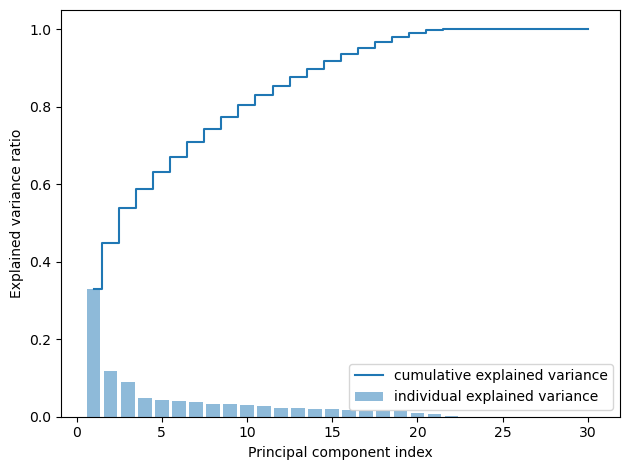

In [16]:
#Calculate cumulative sum of explained variances then plot
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse = True)]

cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt

# Get the length of var_exp to ensure we have the right range
n_components = len(var_exp)

# Update the range to match the length of var_exp
plt.bar(range(1, n_components + 1), var_exp, alpha = 0.5, align = 'center', label = 'individual explained variance')
plt.step(range(1, n_components + 1), cum_var_exp, where = 'mid', label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [17]:
#Sort the eigenpairs by DESC order of eigenvalues
#Construct a projection matrix from selected eigenvectors
#Use projection matrix to transform data onto lower-dimensional subspace

#Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

#Sort the typles from high to low
eigen_pairs.sort(key = lambda k: k[0], reverse = True)

In [18]:
eigen_pairs

[(np.float64(9.918460811914825),
  array([ 0.07081176,  0.071698  ,  0.2824046 ,  0.18441568, -0.00461849,
          0.02805697, -0.03660838, -0.03060321,  0.03060321,  0.109421  ,
          0.17836377, -0.30293989, -0.30293989,  0.12117803, -0.30293989,
          0.1524535 , -0.30293989,  0.15850453, -0.30293989,  0.12760704,
         -0.30293989,  0.17806633, -0.30293989,  0.17988606, -0.00328451,
         -0.03310206,  0.11899574,  0.01589829,  0.09418919, -0.13444795])),
 (np.float64(3.5609383056085337),
  array([ 0.06476962, -0.44163593, -0.07275781, -0.3775918 ,  0.00673157,
         -0.25745685, -0.18363879, -0.09295663,  0.09295663, -0.17167944,
          0.05948395, -0.11477039, -0.11477039, -0.17723532, -0.11477039,
         -0.17402633, -0.11477039, -0.19968983, -0.11477039, -0.20333974,
         -0.11477039, -0.13889148, -0.11477039, -0.14105253, -0.10227475,
         -0.35518718,  0.07025438, -0.1831363 ,  0.22585603,  0.04615412])),
 (np.float64(2.725730964293684),
  arra

In [19]:
#Collect the two eigenvectors that correspond to the two largest eigenvalues
#that captured ~50% of the variance in the dataset (from plot)
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.07081176  0.06476962]
 [ 0.071698   -0.44163593]
 [ 0.2824046  -0.07275781]
 [ 0.18441568 -0.3775918 ]
 [-0.00461849  0.00673157]
 [ 0.02805697 -0.25745685]
 [-0.03660838 -0.18363879]
 [-0.03060321 -0.09295663]
 [ 0.03060321  0.09295663]
 [ 0.109421   -0.17167944]
 [ 0.17836377  0.05948395]
 [-0.30293989 -0.11477039]
 [-0.30293989 -0.11477039]
 [ 0.12117803 -0.17723532]
 [-0.30293989 -0.11477039]
 [ 0.1524535  -0.17402633]
 [-0.30293989 -0.11477039]
 [ 0.15850453 -0.19968983]
 [-0.30293989 -0.11477039]
 [ 0.12760704 -0.20333974]
 [-0.30293989 -0.11477039]
 [ 0.17806633 -0.13889148]
 [-0.30293989 -0.11477039]
 [ 0.17988606 -0.14105253]
 [-0.00328451 -0.10227475]
 [-0.03310206 -0.35518718]
 [ 0.11899574  0.07025438]
 [ 0.01589829 -0.1831363 ]
 [ 0.09418919  0.22585603]
 [-0.13444795  0.04615412]]


In [20]:
print(f'{len(w)} x {len(w.T)}-dimensional projection')

30 x 2-dimensional projection


In [21]:
#Transform an example 'x' (a 30-dimensional row vector) onto PCA subspace (PC one and two)
#This obtains 'x' (a two-dimensional example vector consisting of two new features)
X_train_std[0].dot(w)

array([1.07565349, 0.67878337])

In [22]:
#Transform entire 4930 x 30-dimensional training set onto the two PC
#by calculating matrix dot product
X_train_pca = X_train_std.dot(w)

In [23]:
X_train_pca.shape #Should result in (4930, 2) after dot product

(4930, 2)

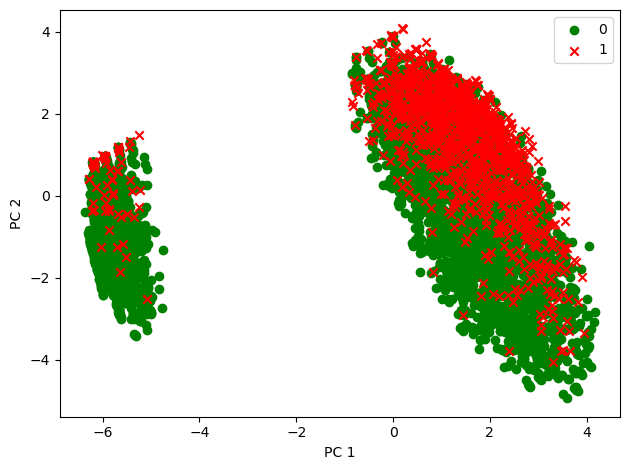

In [24]:
#two-dim scatterplot
colors = ['g', 'r']  # green for non-churn (0), red for churn (1)
markers = ['o', 'x']  # circle for non-churn, x for churn

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], X_train_pca[y_train == l, 1], c = c, label = l, marker = m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [25]:
pc1_vals = eigen_pairs[0][1]
pc2_vals = eigen_pairs[1][1]

In [26]:
PC1_vis = pd.DataFrame(pc1_vals, feature_names)
PC1_vis['magnitude'] = PC1_vis[:].abs()
PC1_vis.sort_values(by = 'magnitude', ascending = False)

,0,magnitude
internetservice_no,-0.302940,0.302940
onlinesecurity_no_internet_service,-0.302940,0.302940
streamingmovies_no_internet_service,-0.302940,0.302940
streamingtv_no_internet_service,-0.302940,0.302940
onlinebackup_no_internet_service,-0.302940,0.302940
deviceprotection_no_internet_service,-0.302940,0.302940
techsupport_no_internet_service,-0.302940,0.302940
monthlycharges,0.282405,0.282405
totalcharges,0.184416,0.184416
streamingmovies_yes,0.179886,0.179886


In [27]:
PC2_vis = pd.DataFrame(pc2_vals, feature_names)
PC2_vis['magnitude'] = PC2_vis[:].abs()
PC2_vis.sort_values(by = 'magnitude', ascending = False)

,0,magnitude
tenure,-0.441636,0.441636
totalcharges,-0.377592,0.377592
contract_two_year,-0.355187,0.355187
partner_yes,-0.257457,0.257457
paymentmethod_electronic_check,0.225856,0.225856
techsupport_yes,-0.203340,0.203340
deviceprotection_yes,-0.199690,0.199690
dependents_yes,-0.183639,0.183639
paymentmethod_credit_card_(automatic),-0.183136,0.183136
onlinesecurity_yes,-0.177235,0.177235


In [28]:
#Comparing with PCA class from scikit
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):

    #setup marker generator and color map
    markers = ('o', 'x', 's', '^', 'v') # Only first two needed for churn dataset
    colors = ('green', 'red', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 0].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.6, color = cmap(idx), 
                    marker = markers[idx], label = cl)

C:\Users\melvi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


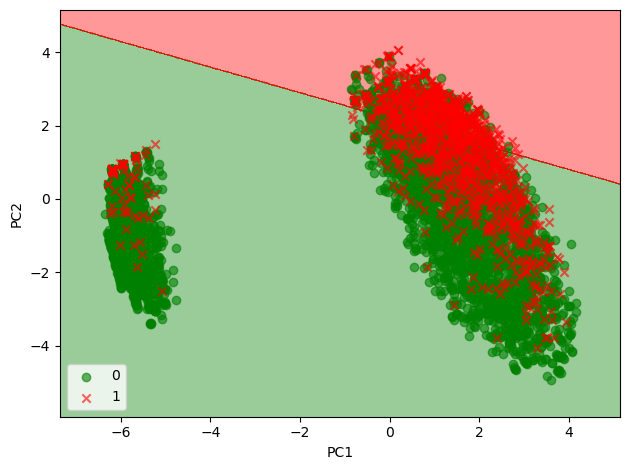

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
# Initializing the PCA transformer and logistic regression model

pca = PCA(n_components = 2)
lr = LogisticRegression(multi_class = 'ovr', random_state = 1, solver = 'lbfgs')

#Dimensionality reduction
X_train_pca = pca.fit_transform(X_train_std) * -1
X_test_pca = pca.transform(X_test_std) * -1

#Fitting the LR Model on the reduced training dataset
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier = lr)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

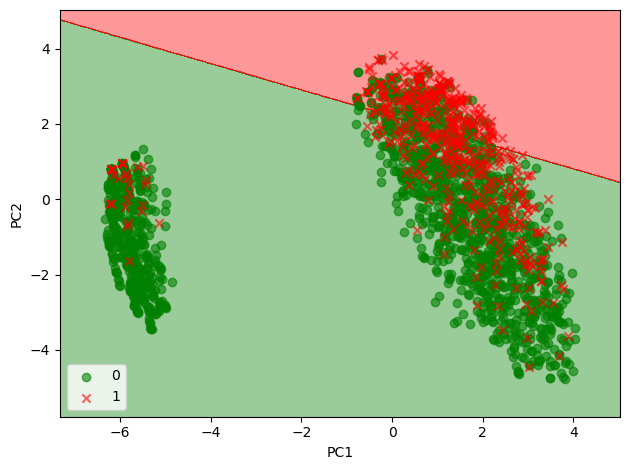

In [30]:
#Repeated for test dataset
plot_decision_regions(X_test_pca, y_test, classifier = lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

In [31]:
#Explained variance ratio
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_.round(2)

array([0.33, 0.12, 0.09, 0.05, 0.04, 0.04, 0.04, 0.03, 0.03, 0.03, 0.03,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [32]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7666824420255561


In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

# probability of churn (class = 1)
y_prob = lr.predict_proba(X_test_pca)[:, 1]

fpr, tpr, thresholds_pca = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

print("AUC:", auc)

AUC: 0.7966580887466963


In [34]:
#----------------------------------

In [35]:
#Compare w/o PCA
log_reg_full = LogisticRegression(random_state=42)
log_reg_full.fit(X_train_std, y_train)
y_pred_full = log_reg_full.predict(X_test_std)

print("Two PCA Accuracy:", accuracy_score(y_test, y_pred))
print("Full Feature Accuracy:", accuracy_score(y_test, y_pred_full))

Two PCA Accuracy: 0.7666824420255561
Full Feature Accuracy: 0.8026502602934217


In [36]:
w_3PCA = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis], eigen_pairs[2][1][:, np.newaxis]))
print('Matrix W_3PCA:\n', w_3PCA)

Matrix W_3PCA:
 [[ 0.07081176  0.06476962  0.13382729]
 [ 0.071698   -0.44163593 -0.03932194]
 [ 0.2824046  -0.07275781  0.2279425 ]
 [ 0.18441568 -0.3775918   0.06757523]
 [-0.00461849  0.00673157 -0.00488873]
 [ 0.02805697 -0.25745685 -0.04221033]
 [-0.03660838 -0.18363879 -0.11969468]
 [-0.03060321 -0.09295663  0.51374024]
 [ 0.03060321  0.09295663 -0.51374024]
 [ 0.109421   -0.17167944  0.27511605]
 [ 0.17836377  0.05948395  0.35204778]
 [-0.30293989 -0.11477039  0.07282886]
 [-0.30293989 -0.11477039  0.07282886]
 [ 0.12117803 -0.17723532 -0.17898599]
 [-0.30293989 -0.11477039  0.07282886]
 [ 0.1524535  -0.17402633 -0.05717849]
 [-0.30293989 -0.11477039  0.07282886]
 [ 0.15850453 -0.19968983 -0.05698967]
 [-0.30293989 -0.11477039  0.07282886]
 [ 0.12760704 -0.20333974 -0.16711215]
 [-0.30293989 -0.11477039  0.07282886]
 [ 0.17806633 -0.13889148  0.05398623]
 [-0.30293989 -0.11477039  0.07282886]
 [ 0.17988606 -0.14105253  0.05626553]
 [-0.00328451 -0.10227475 -0.0479047 ]
 [-0.0331

In [37]:
pca_3d = PCA(n_components=3)
X_train_pca_3d = pca_3d.fit_transform(X_train_std)
X_test_pca_3d = pca_3d.transform(X_test_std)
 
log_reg_3d = LogisticRegression()
log_reg_3d.fit(X_train_pca_3d, y_train)

accuracy_3d = log_reg_3d.score(X_test_pca_3d, y_test)
print(f"3D PCA Accuracy: {accuracy_3d:.3f}")

3D PCA Accuracy: 0.779
